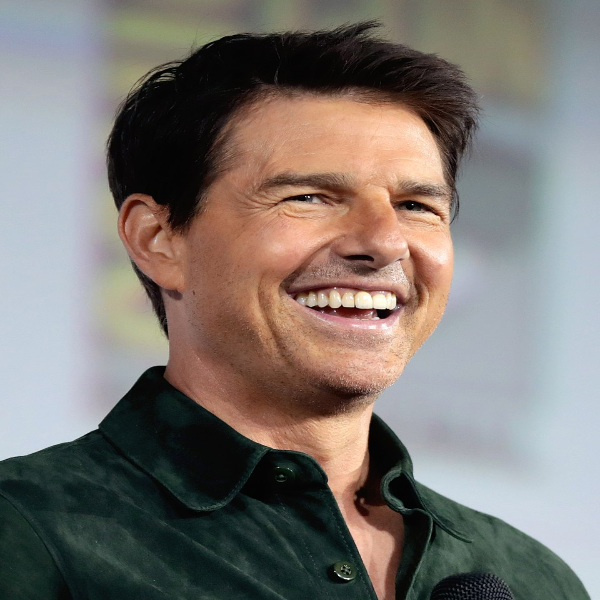

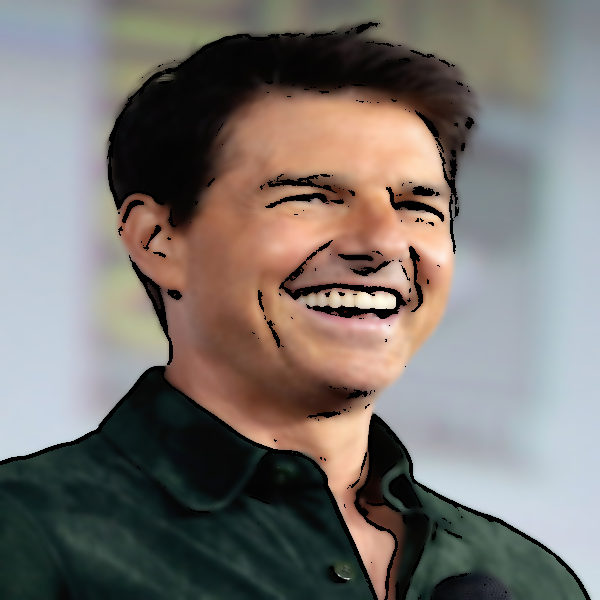

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def cartoonize_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (600, 600))  # Resize for consistency

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply median blur to remove noise
    gray_blur = cv2.medianBlur(gray, 7)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter to preserve edges while smoothing colors
    color = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

    # Combine edges and filtered image
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Show results using cv2_imshow instead of cv2.imshow
    cv2_imshow(img)  # Display the original image
    cv2_imshow(cartoon)  # Display the cartoonized image
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Run the function
cartoonize_image("/content/Tom_Cruise_by_Gage_Skidmore_2.jpg")
